In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
imdb_df = pd.read_csv('imdb_top_1000.csv')
imdb_df.columns = imdb_df.columns.str.lower()

In [3]:
imdb_df.head()

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Checking data consistency and integrity


In [4]:
#dataset information
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poster_link    1000 non-null   object 
 1   series_title   1000 non-null   object 
 2   released_year  1000 non-null   object 
 3   certificate    899 non-null    object 
 4   runtime        1000 non-null   object 
 5   genre          1000 non-null   object 
 6   imdb_rating    1000 non-null   float64
 7   overview       1000 non-null   object 
 8   meta_score     843 non-null    float64
 9   director       1000 non-null   object 
 10  star1          1000 non-null   object 
 11  star2          1000 non-null   object 
 12  star3          1000 non-null   object 
 13  star4          1000 non-null   object 
 14  no_of_votes    1000 non-null   int64  
 15  gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [5]:
#checking which columns have null data and how many rows of each column have null data
imdb_df.isnull().sum()

poster_link        0
series_title       0
released_year      0
certificate      101
runtime            0
genre              0
imdb_rating        0
overview           0
meta_score       157
director           0
star1              0
star2              0
star3              0
star4              0
no_of_votes        0
gross            169
dtype: int64

### Correcting data inconsistencies

In [6]:
#Unique certificae values
imdb_df['certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [7]:
#filling certificate null values
imdb_df['certificate'] = imdb_df['certificate'].fillna('Not rated')

In [8]:
#dropping null data
imdb_df.dropna(inplace=True)

In [9]:
#Converting the gross field to a numeric value
imdb_df['gross'] = imdb_df['gross'].str.replace(',', '').astype(float)

In [10]:
#Checking movies that have words in place of the release year
imdb_df[~imdb_df['released_year'].str.isnumeric()]

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [11]:
#Adjusting the value of the only film that has the certificate in place of the year of release, this information was taken from Wikipedia
imdb_df['released_year'] = imdb_df['released_year'].replace('PG', '1995')

In [12]:
imdb_df.head()

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [13]:
print("Unique runtime values size:", len(imdb_df['runtime'].unique()))
print('Number of unique runtimes that have "minute" as the time unit:', 
      len(imdb_df[imdb_df['runtime'].str.endswith('min')]['runtime'].unique()))


Unique runtime values size: 121
Number of unique runtimes that have "minute" as the time unit: 121


In [14]:
#Transforming the runtime column to a numeric value
imdb_df['runtime'] = imdb_df['runtime'].str.split(' ').str[0].astype(int)
imdb_df.rename(columns={'runtime': 'runtime_minutes'}, inplace=True)

In [15]:
imdb_df.head()

,poster_link,series_title,released_year,certificate,runtime_minutes,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


### Analyzing the data

In [16]:
#Data describe
imdb_df.describe()

,runtime_minutes,imdb_rating,meta_score,no_of_votes,gross
count,750.000000,750.000000,750.000000,7.500000e+02,7.500000e+02
mean,123.302667,7.934800,77.460000,3.421327e+05,7.495207e+07
std,26.020745,0.289103,12.493967,3.509795e+05,1.133280e+08
min,71.000000,7.600000,28.000000,2.519800e+04,1.305000e+03
25%,104.000000,7.700000,70.000000,8.854725e+04,5.014812e+06
50%,120.000000,7.900000,78.000000,2.197340e+05,3.190000e+07
75%,136.000000,8.100000,86.000000,4.812185e+05,9.809157e+07
max,238.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


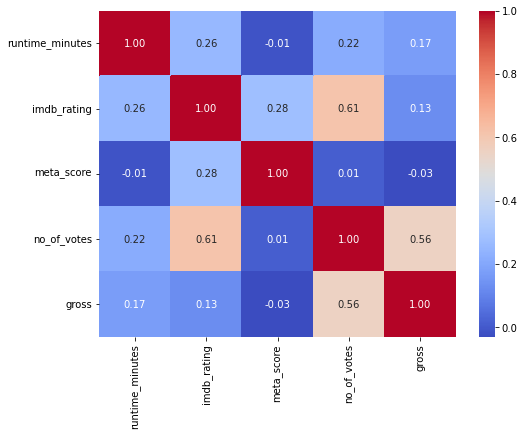

In [17]:
#Correlation Matrix
mat_corr = imdb_df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=mat_corr, cmap="coolwarm", annot=True, fmt=".2f");

Based on the matrix above we can highlight some correlations:
- **runtime_minutes and imdb_rating:** There is a weak, positive correlation (0.26), indicating that films with a longer duration tend to have a higher rating on imdb.
- **runtime_minutes and no_of_votes:** There is a weak, positive correlation (0.22), indicating that films with a longer duration tend to have a higher number of votes.
- **imbd_rating and no_of_votes:** There is a moderate and positive correlation (0.61), indicating that more voted films tend to have a higher rating on imdb.
- **imbd_rating and meta_score:** There is a weak, positive correlation (0.28), indicating that movies with a higher imdb rating tend to have a higher meta_score.
- **no_of_votes and gross:**: There is a moderate, positive correlation (0.56), indicating that films with a higher number of votes tend to have higher revenue.
